<a href="https://colab.research.google.com/github/Harshit28012002/MRM-Harshit-class-assignment/blob/main/Orders_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
file_path = "ORDERS.csv"  # Update with actual file path
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)

# Aggregate sales by date for time series analysis
time_series = df.groupby('ORDERDATE').agg({'SALES': 'sum'}).reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(time_series['ORDERDATE'], time_series['SALES'], label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(time_series.set_index('ORDERDATE')['SALES'], model='additive', period=30)
decomposition.plot()
plt.show()

# Sales trends by Product Category
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ORDERDATE', y='SALES', hue='PRODUCTCATEGORY', estimator='sum')
plt.xticks(rotation=45)
plt.title('Sales Trends by Product Category')
plt.legend(title='Product Category')
plt.show()

# Sales trends by Product Subcategory
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PRODUCTSUBCATEGORY', y='SALES')
plt.xticks(rotation=90)
plt.title('Sales Distribution by Product Subcategory')
plt.show()

# Sales trends by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ORDERDATE', y='SALES', hue='REGION', estimator='sum')
plt.xticks(rotation=45)
plt.title('Sales Trends by Region')
plt.legend(title='Region')
plt.show()

# Sales trends by Province
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='PROVINCE', y='SALES', estimator='sum')
plt.xticks(rotation=90)
plt.title('Total Sales by Province')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'ORDERS.csv'

<ipython-input-2-7265dfa60480>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')


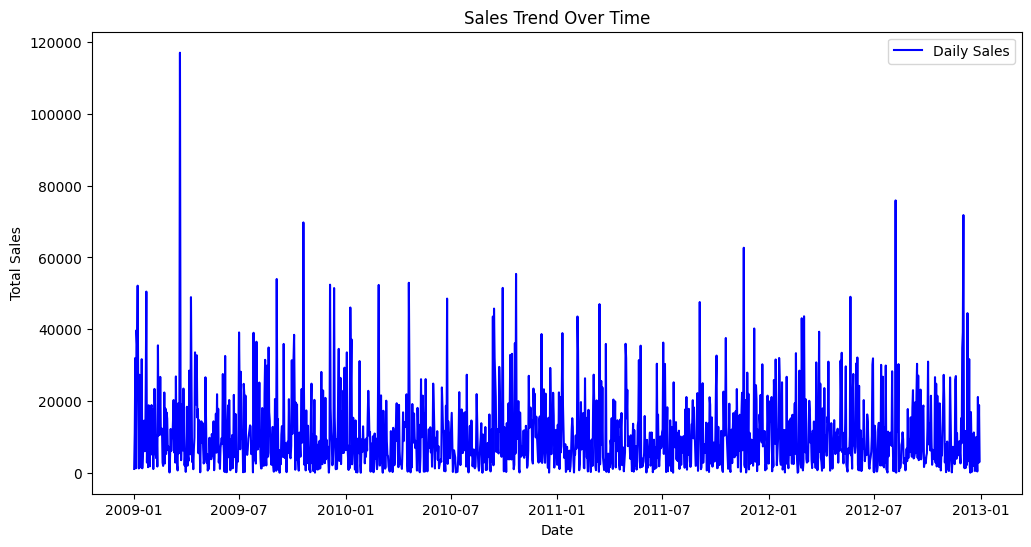

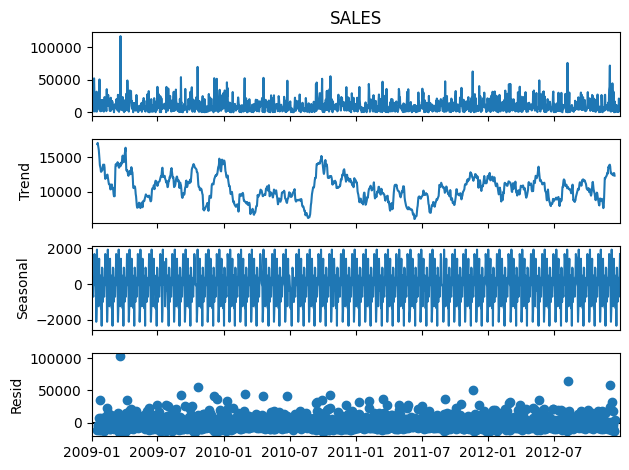

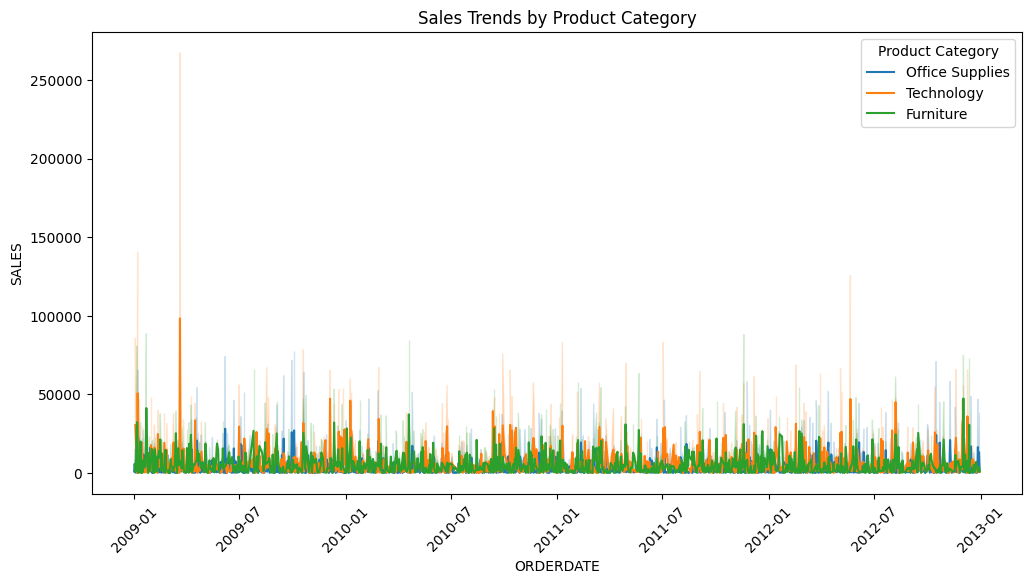

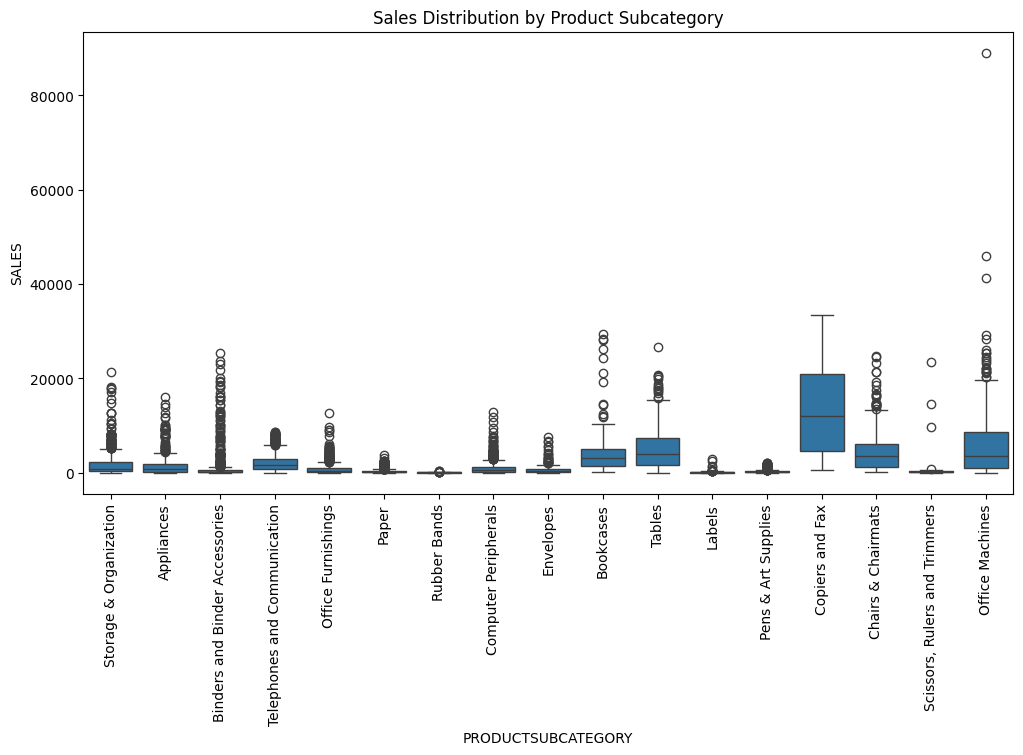

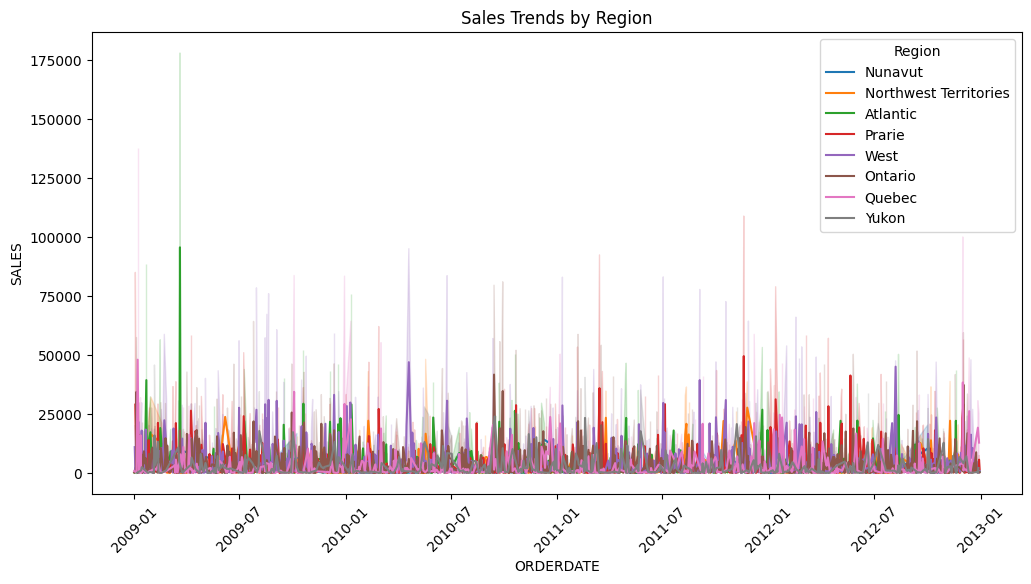

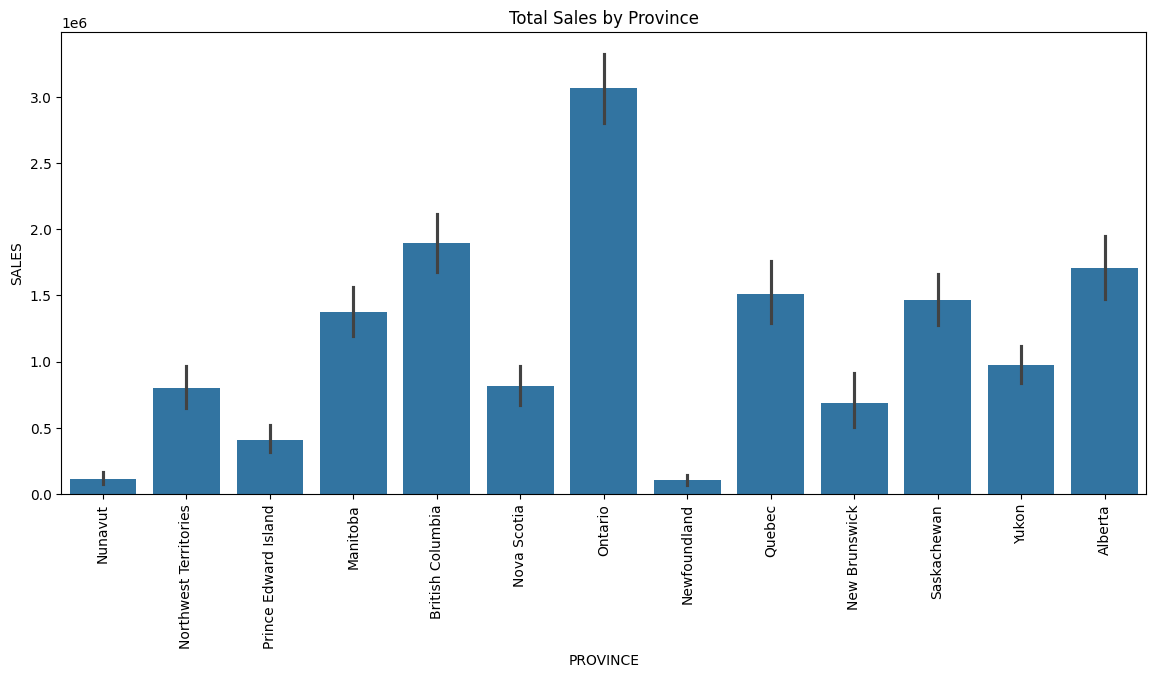

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
file_path = "/content/ORDERS (1).csv"  # Update with actual file path
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)

# Aggregate sales by date for time series analysis
time_series = df.groupby('ORDERDATE').agg({'SALES': 'sum'}).reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(time_series['ORDERDATE'], time_series['SALES'], label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(time_series.set_index('ORDERDATE')['SALES'], model='additive', period=30)
decomposition.plot()
plt.show()

# Sales trends by Product Category
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ORDERDATE', y='SALES', hue='PRODUCTCATEGORY', estimator='sum')
plt.xticks(rotation=45)
plt.title('Sales Trends by Product Category')
plt.legend(title='Product Category')
plt.show()

# Sales trends by Product Subcategory
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='PRODUCTSUBCATEGORY', y='SALES')
plt.xticks(rotation=90)
plt.title('Sales Distribution by Product Subcategory')
plt.show()

# Sales trends by Region
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='ORDERDATE', y='SALES', hue='REGION', estimator='sum')
plt.xticks(rotation=45)
plt.title('Sales Trends by Region')
plt.legend(title='Region')
plt.show()

# Sales trends by Province
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='PROVINCE', y='SALES', estimator='sum')
plt.xticks(rotation=90)
plt.title('Total Sales by Province')
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest
from fbprophet import Prophet

# Load dataset
file_path = "/content/ORDERS (1).csv")

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)

# Aggregate sales by date for time series analysis
time_series = df.groupby('ORDERDATE').agg({'SALES': 'sum'}).reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(time_series['ORDERDATE'], time_series['SALES'], label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(time_series.set_index('ORDERDATE')['SALES'], model='additive', period=30)
decomposition.plot()
plt.show()

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
time_series['anomaly'] = iso_forest.fit_predict(time_series[['SALES']])

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=time_series, x='ORDERDATE', y='SALES', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in Sales')
plt.legend(title='Anomaly')
plt.show()

# Forecasting using Prophet
df_prophet = time_series.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})
prophet = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet.fit(df_prophet)
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)

# Plot forecast
prophet.plot(forecast)
plt.title('Sales Forecast for Next Year')
plt.show()


SyntaxError: unmatched ')' (<ipython-input-3-8dd380f3a515>, line 9)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest
from fbprophet import Prophet

# Load dataset
file_path = "/content/ORDERS (1).csv"

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)

# Aggregate sales by date for time series analysis
time_series = df.groupby('ORDERDATE').agg({'SALES': 'sum'}).reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(time_series['ORDERDATE'], time_series['SALES'], label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(time_series.set_index('ORDERDATE')['SALES'], model='additive', period=30)
decomposition.plot()
plt.show()

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
time_series['anomaly'] = iso_forest.fit_predict(time_series[['SALES']])

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=time_series, x='ORDERDATE', y='SALES', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in Sales')
plt.legend(title='Anomaly')
plt.show()

# Forecasting using Prophet
df_prophet = time_series.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})
prophet = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet.fit(df_prophet)
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)

# Plot forecast
prophet.plot(forecast)
plt.title('Sales Forecast for Next Year')
plt.show()


ModuleNotFoundError: No module named 'fbprophet'

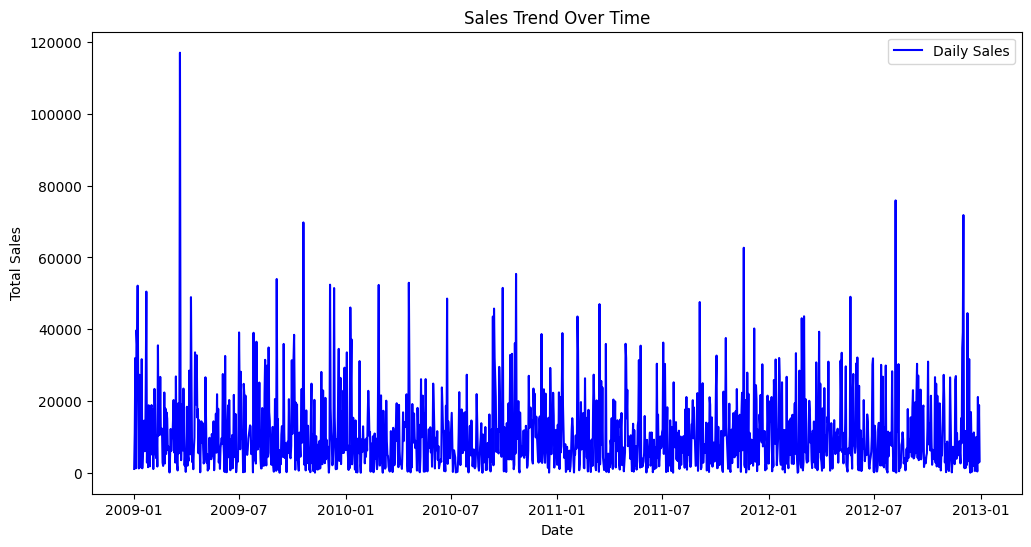

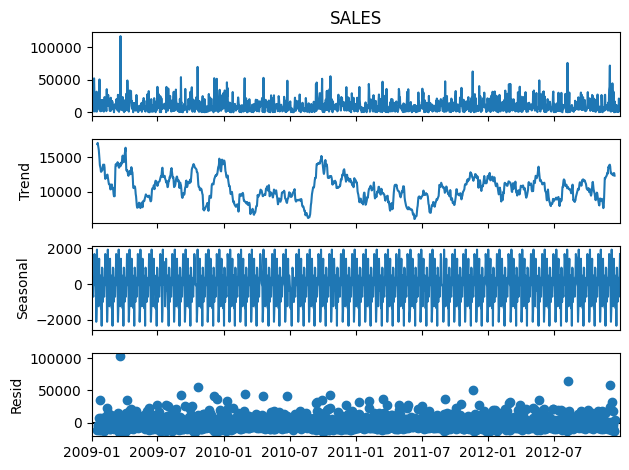

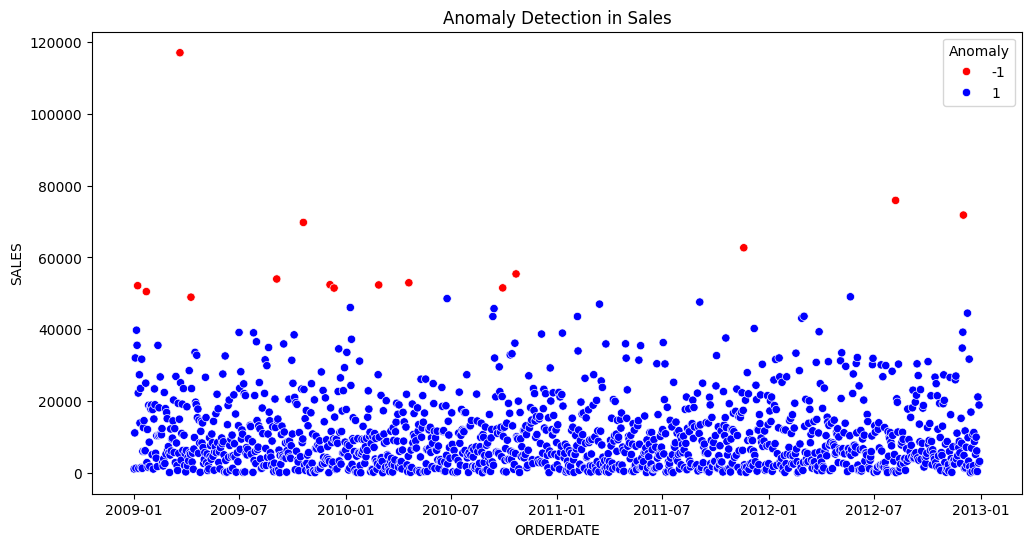

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8c44t8ya/7qxqn6u_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8c44t8ya/t98e7xy3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70293', 'data', 'file=/tmp/tmp8c44t8ya/7qxqn6u_.json', 'init=/tmp/tmp8c44t8ya/t98e7xy3.json', 'output', 'file=/tmp/tmp8c44t8ya/prophet_modelf31us0ts/prophet_model-20250210063300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:33:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:33:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


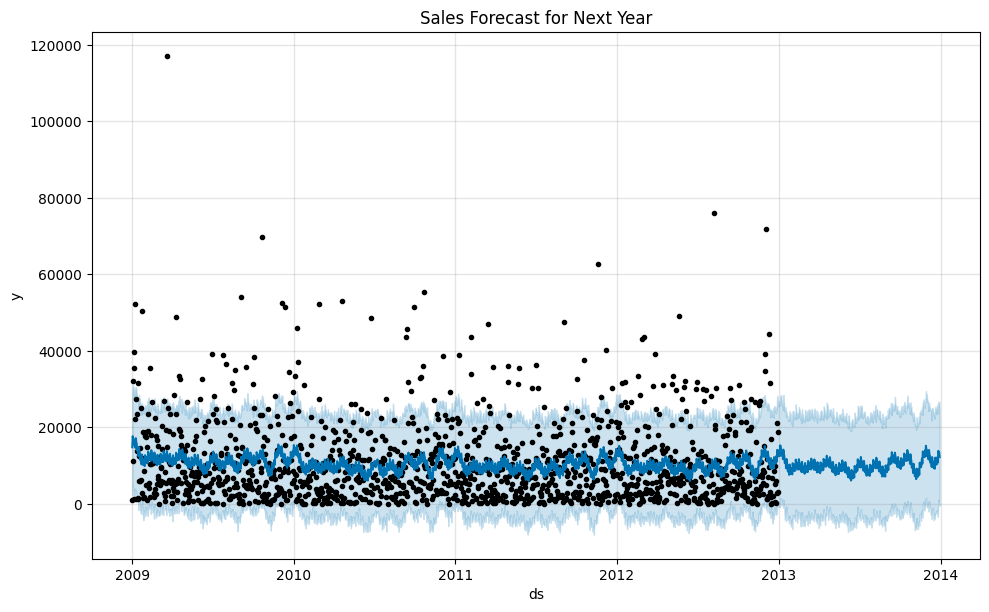

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest
from prophet import Prophet

# Load dataset
file_path = "/content/ORDERS (1).csv"

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
df.dropna(subset=['ORDERDATE'], inplace=True)

# Aggregate sales by date for time series analysis
time_series = df.groupby('ORDERDATE').agg({'SALES': 'sum'}).reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(time_series['ORDERDATE'], time_series['SALES'], label='Daily Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.legend()
plt.show()

# Seasonal Decomposition
decomposition = seasonal_decompose(time_series.set_index('ORDERDATE')['SALES'], model='additive', period=30)
decomposition.plot()
plt.show()

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
time_series['anomaly'] = iso_forest.fit_predict(time_series[['SALES']])

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=time_series, x='ORDERDATE', y='SALES', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in Sales')
plt.legend(title='Anomaly')
plt.show()

# Forecasting using Prophet
df_prophet = time_series.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})
prophet = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet.fit(df_prophet)
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)

# Plot forecast
prophet.plot(forecast)
plt.title('Sales Forecast for Next Year')
plt.show()
